In [1]:
%load_ext autoreload
%autoreload 2

import nest
import sys
import os.path
import numpy as np
from math import degrees
import matplotlib.pyplot as plt

sys.path.append('../')
import params
import nest_tools
import mnist_tools

# reseed numpy
np.random.seed(0)

# create samples

# load data - some preprocessing is done in the module (reshaping)
(x_train, y_train), (x_val, y_val), (x_test, y_test) = mnist_tools.load_mnist_data('../mnist.pkl.gz')

# create pixel samples
pixel_samples = mnist_tools.create_samples(4000, sample_size=40)

network = nest_tools.Network(plasticity=True, target_rate=8.0/1000)
network.reset_nest()
network.setup_static_network()
network.record_spikes('recording')


######### rate 15000.000000000004


saving to recording.0.npy


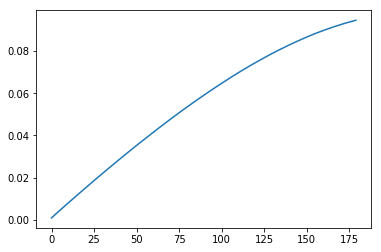

In [2]:
if not os.path.exists('recording.0.npy'):
    vals = []
    for i in range(180):
        nest.Simulate(1000)
        m = network.snapshot_connectivity()
        mn = np.mean(m)
        vals.append(mn)
    
    plt.plot(vals)    
    network.save_recording('recording')

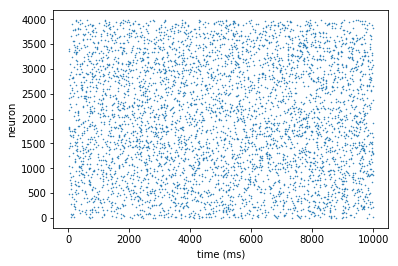

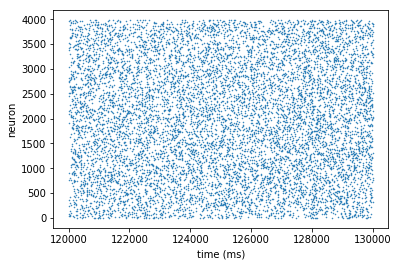

In [7]:
recording = nest_tools.SpikeRecording.from_file('recording')

# raster plot - consider every 20th neuron of excitatory population (first 4000 neurons)
recording.plot(neurons=range(1,4000,20), start=0, end = 10000)

plt.figure()
# raster plot - consider every 20th neuron of excitatory population (first 4000 neurons)
recording.plot(neurons=range(1,4000,20), start=120000, end = 130000)



In [8]:
rates = recording.rate(neurons=range(1,4000), start=0, end=10000)

In [9]:
np.mean(rates)

2.290472618154538

In [ ]:
plt.imshow(m)